In [1]:
import pandas as pd
import re
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
import geopandas as gpd
import descartes
from shapely.geometry import Point, Polygon
# import wordcloud
# from sklearn.preprocessing import OneHotEncoder
# import matplotlib.animation as animation
import nltk
from sklearn.cluster import KMeans
from myfunctions import *
sns.set()

[nltk_data] Downloading package wordnet to /Users/aditya/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/aditya/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/aditya/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:

datadf = pd.read_csv(r'All Data/Raw Journey Data/Until16May2020(all jsons to csv).csv')

In [3]:
datadf = datadf.set_index('id')

In [4]:
datadf.head(4)

,no_stop,text,date_modified,date_journal,address,lat,lon,mood,timezone,favourite,weather,photos,tags,no_punc,is_personal,cleaned_text
id,,,,,,,,,,,,,,,,
1439137473084-3fc756cc3f8d6404,first thing saw entered room dark curtains dra...,"The first thing I saw ,when I entered her room...",2017-08-31 01:44:57,2015-08-09 11:24:33,NaN,1.7976931348623157e+308,1.7976931348623157e+308,0,NaN,False,"{'id': -1, 'degree_c': 1.7976931348623157e+308...",[],"['personal', 'published']",The first thing I saw when I entered her room ...,1,"The first thing I saw , when I entered her roo..."
1439198245820-3fda14add91e3f20,Philosophy surprises hw u effortlessly make to...,Philosophy\n\n\n\n\n\n\nIt surprises me..hw u ...,2017-08-22 22:08:05,2015-08-10 04:17:25,NaN,1.7976931348623157e+308,1.7976931348623157e+308,0,NaN,False,"{'id': -1, 'degree_c': 1.7976931348623157e+308...",[],['personal'],Philosophy It surprises me hw u so effortlessl...,1,Philosophy It surprises me ... hw you so effor...
1439198461993-3fefd6db711e0342,Write fantasies inaginary dream world stories ...,Me \n\n\nWrite fantasies/inaginary dream world...,2017-10-08 12:24:49,2015-08-10 04:21:01,NaN,1.7976931348623157e+308,1.7976931348623157e+308,0,NaN,False,"{'id': -1, 'degree_c': 1.7976931348623157e+308...",[],['me'],Me Write fantasies inaginary dream world stori...,0,Me Write fantasies / inaginary dream world sto...
1439575035515-3feb330512548cbd,dwarfs garden garden little boy Guarded roses ...,"The dwarfs garden\n\nHe had a garden ,that lit...",2016-04-29 05:23:44,2015-08-14 12:57:15,NaN,1.7976931348623157e+308,1.7976931348623157e+308,0,NaN,False,"{'id': -1, 'degree_c': 1.7976931348623157e+308...",[],['published'],The dwarfs garden He had a garden that little ...,0,"The dwarfs garden He had a garden , that littl..."


In [5]:
loc = datadf[['lat','lon']]
loc.lat = loc.lat.str[:10].astype(float)
loc.lon = loc.lon.str[:10].astype(float)

/usr/local/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [6]:
temp = loc.sample(2000)
temp

,lat,lon
id,,
1502279445126-3f8ced5446547300,18.574927,73.893333
1584120584054-3fe0ed9440c9b6d1,40.720825,-73.997357
1527432317923-3fc8793e2f36bea0,18.574661,73.893259
1580851708407-3fd0b2adbca6d166,40.720845,-73.997383
1446823096820-3fdfaafe02cefef2,1.797693,1.797693
...,...,...
1527300274169-3f494798977e7000,18.539313,73.886217
1586364170103-3fc3b0da44480350,32.970819,-96.980502
1577803744770-3fed284d1b37ecc6,18.526916,73.880702


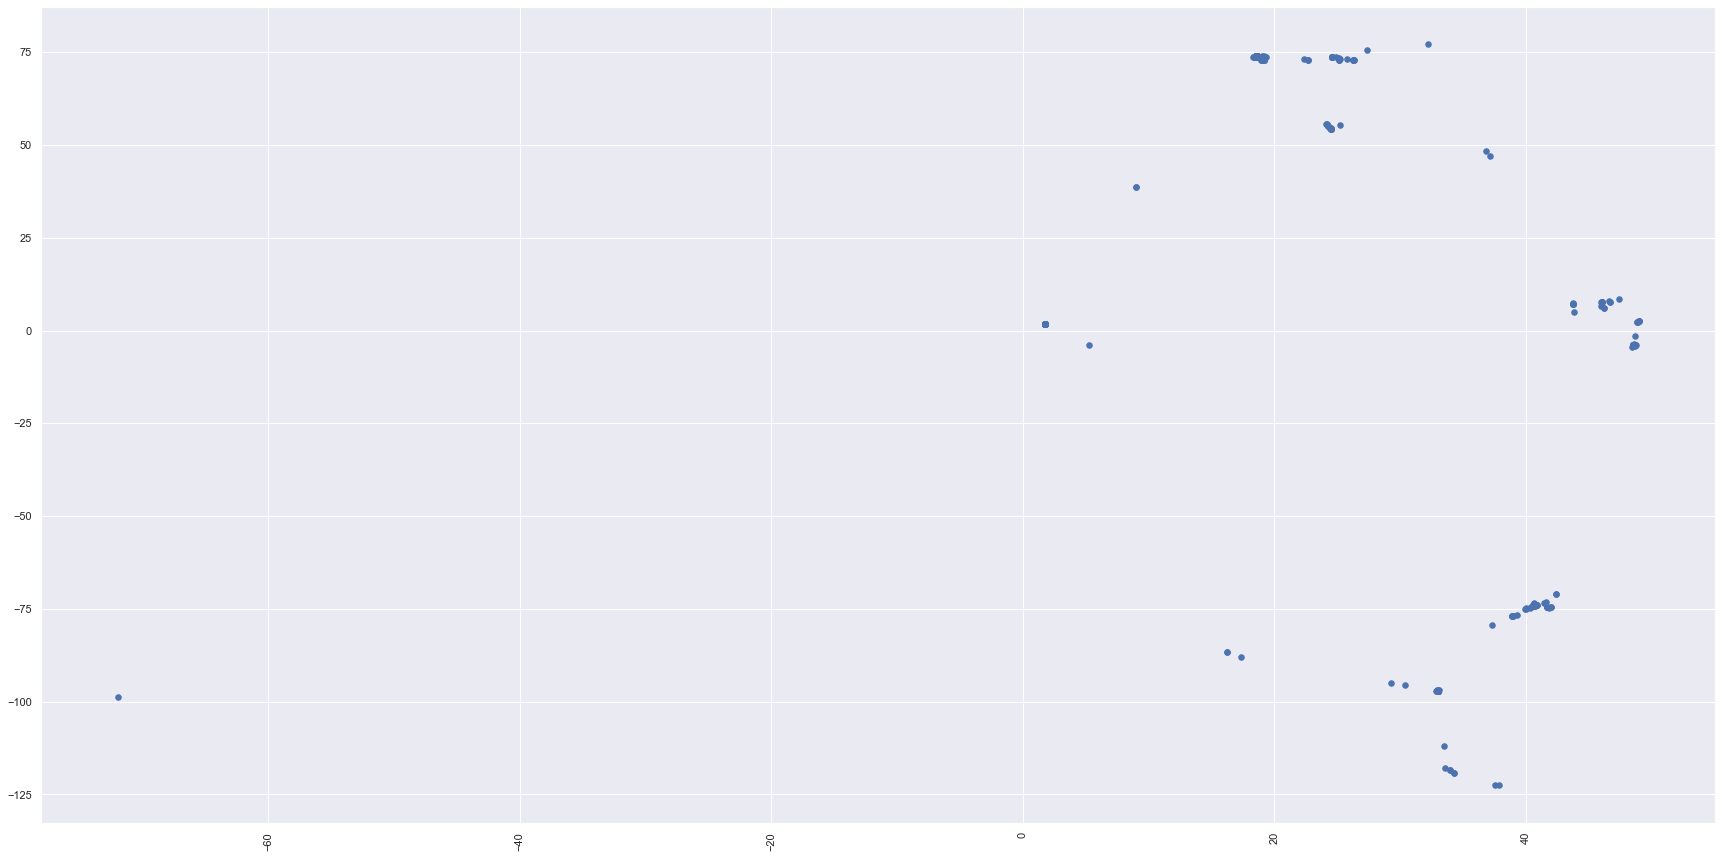

In [7]:
# loc.plot.scatter(x = 'lat', y = 'lon', c=labels, s=50, cmap='viridis')
# plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

plt.figure(figsize=(30,15))
plt.scatter(x = 'lat', y = 'lon', s=30, data=loc)
plt.xticks(rotation=90)
plt.show()

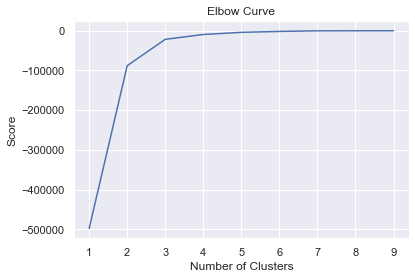

In [8]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = loc[['lat']]
X_axis = loc[['lon']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [9]:
kmeans = KMeans(n_clusters = 3, init ='k-means++')
kmeans.fit(loc[loc.columns[0:1]]) # Compute k-means clustering.
loc['cluster_label'] = kmeans.fit_predict(loc[loc.columns[0:1]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(loc[loc.columns[0:1]]) # Labels of each point

/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
loc

,lat,lon,cluster_label
id,,,
1439137473084-3fc756cc3f8d6404,1.797693,1.797693,1
1439198245820-3fda14add91e3f20,1.797693,1.797693,1
1439198461993-3fefd6db711e0342,1.797693,1.797693,1
1439575035515-3feb330512548cbd,1.797693,1.797693,1
1440393646546-3fdb2bc02b9f8020,1.797693,1.797693,1
...,...,...,...
1572234096800-3fe09f3bcb856ceb,40.720720,-73.997461,0
1572394588516-3fe449570c8486e7,40.729790,-73.991662,0
1573136070396-3feded4b7c9ee046,40.728132,-74.000816,0


In [11]:
centers

array([[39.76562681],
       [ 1.60998753],
       [18.90745455]])

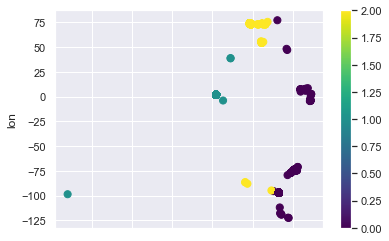

In [12]:
loc.plot.scatter(x = 'lat', y = 'lon', c=labels, s=50, cmap='viridis')
# plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [13]:
world = gpd.read_file('All Data/Longitude_Graticules_and_World_Countries_Boundaries-shp/99bfd9e7-bb42-4728-87b5-07f8c8ac631c2020328-1-1vef4ev.lu5nk.shp')
maha = gpd.read_file('All Data/maharashtra/maharashtra_administrative/maharashtra_administrative.shp')
pune = gpd.read_file('All Data/maharashtra/pune/pune.shp')

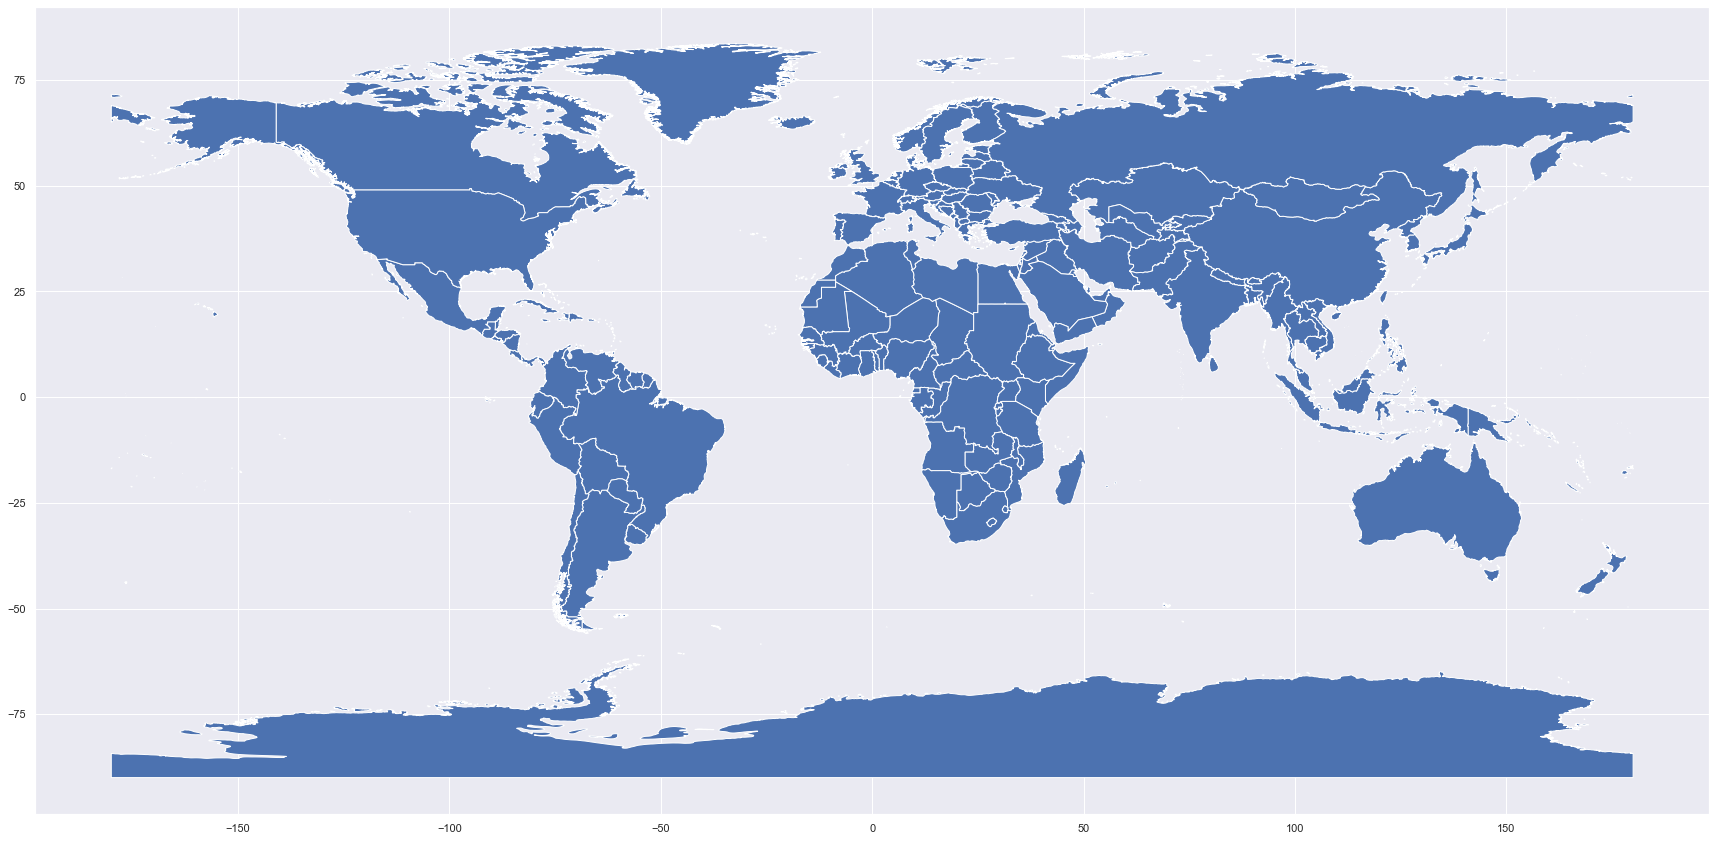

In [14]:
fig, ax = plt.subplots(figsize=(30,25))
world.plot(ax=ax)

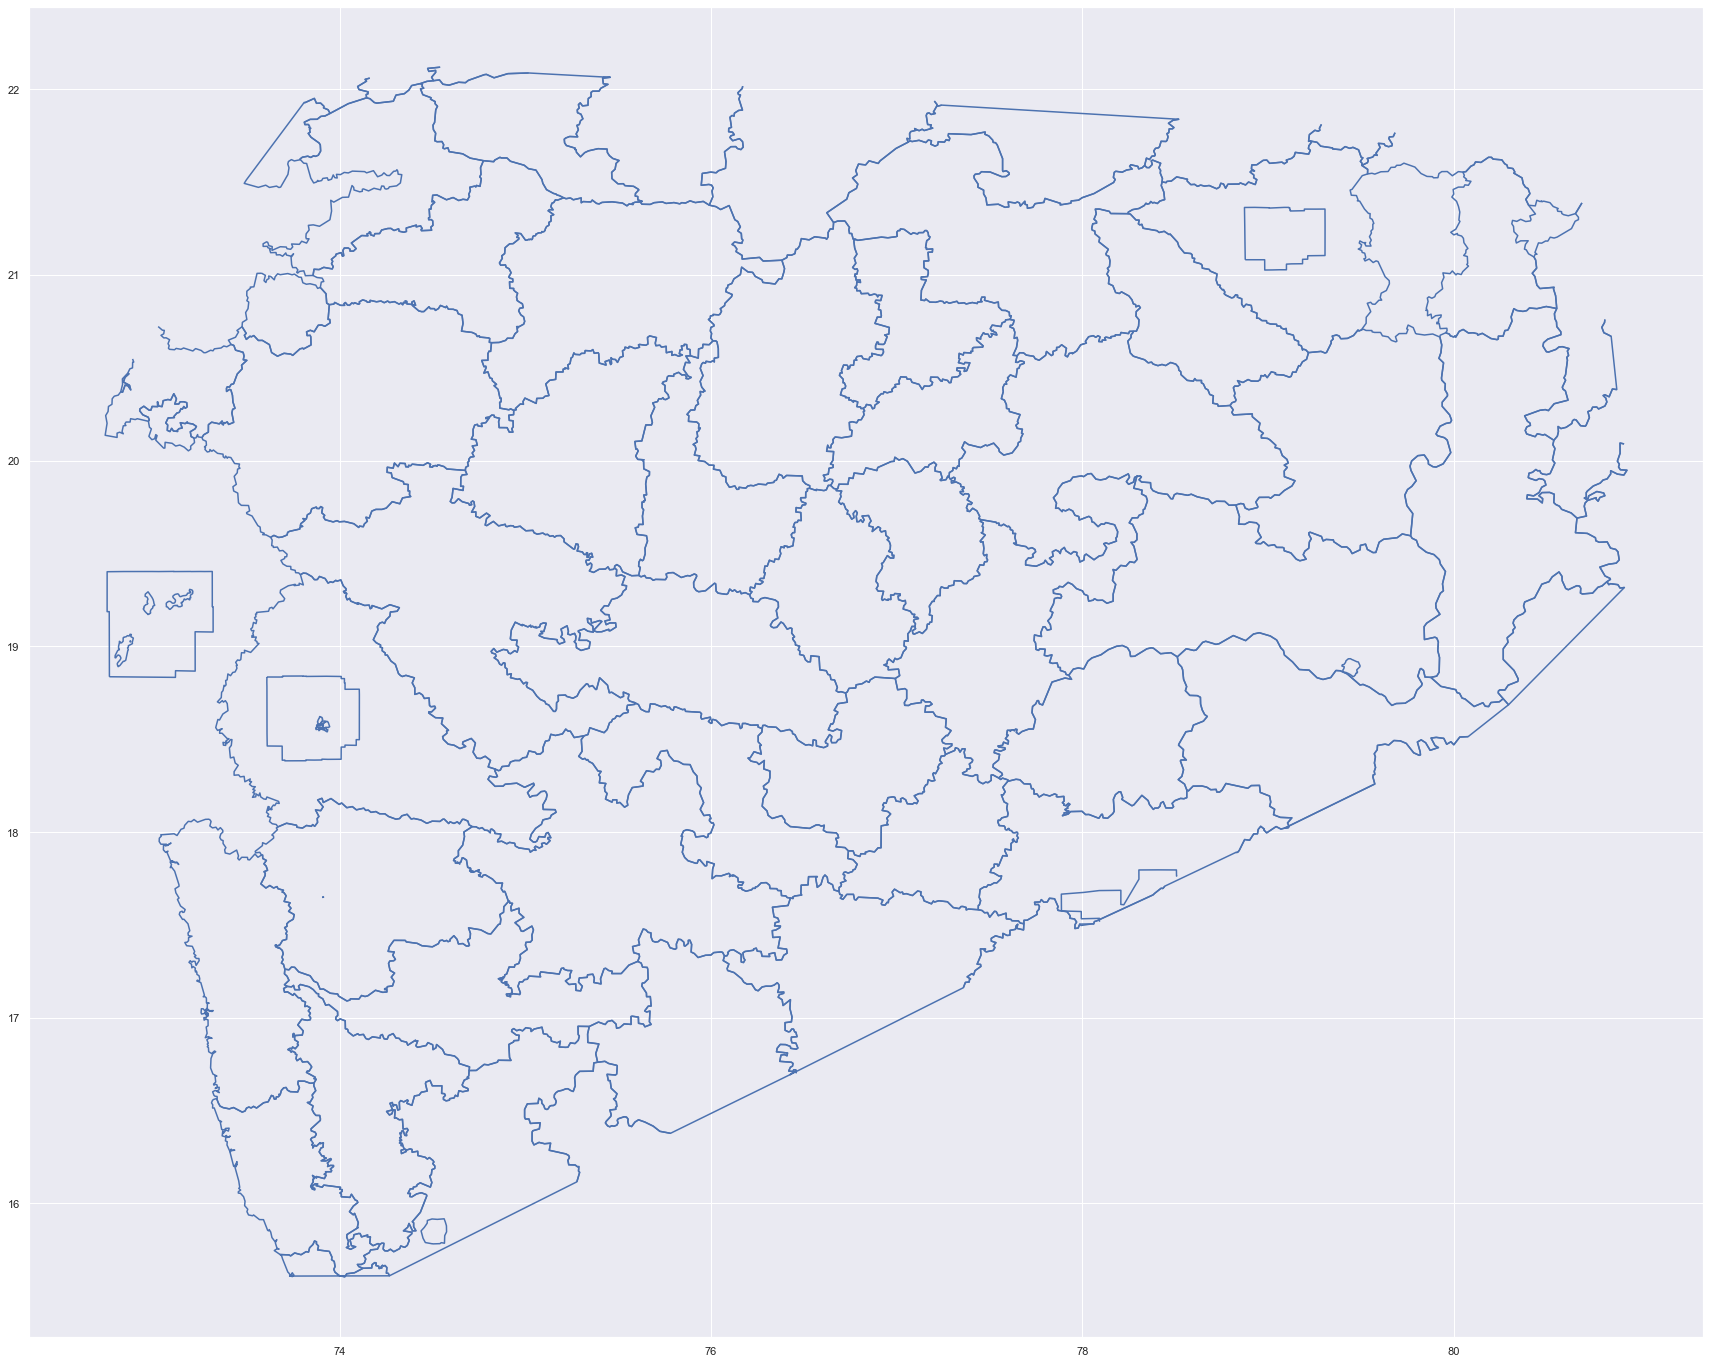

In [15]:
fig, ax = plt.subplots(figsize=(30,25))
maha.plot(ax=ax)

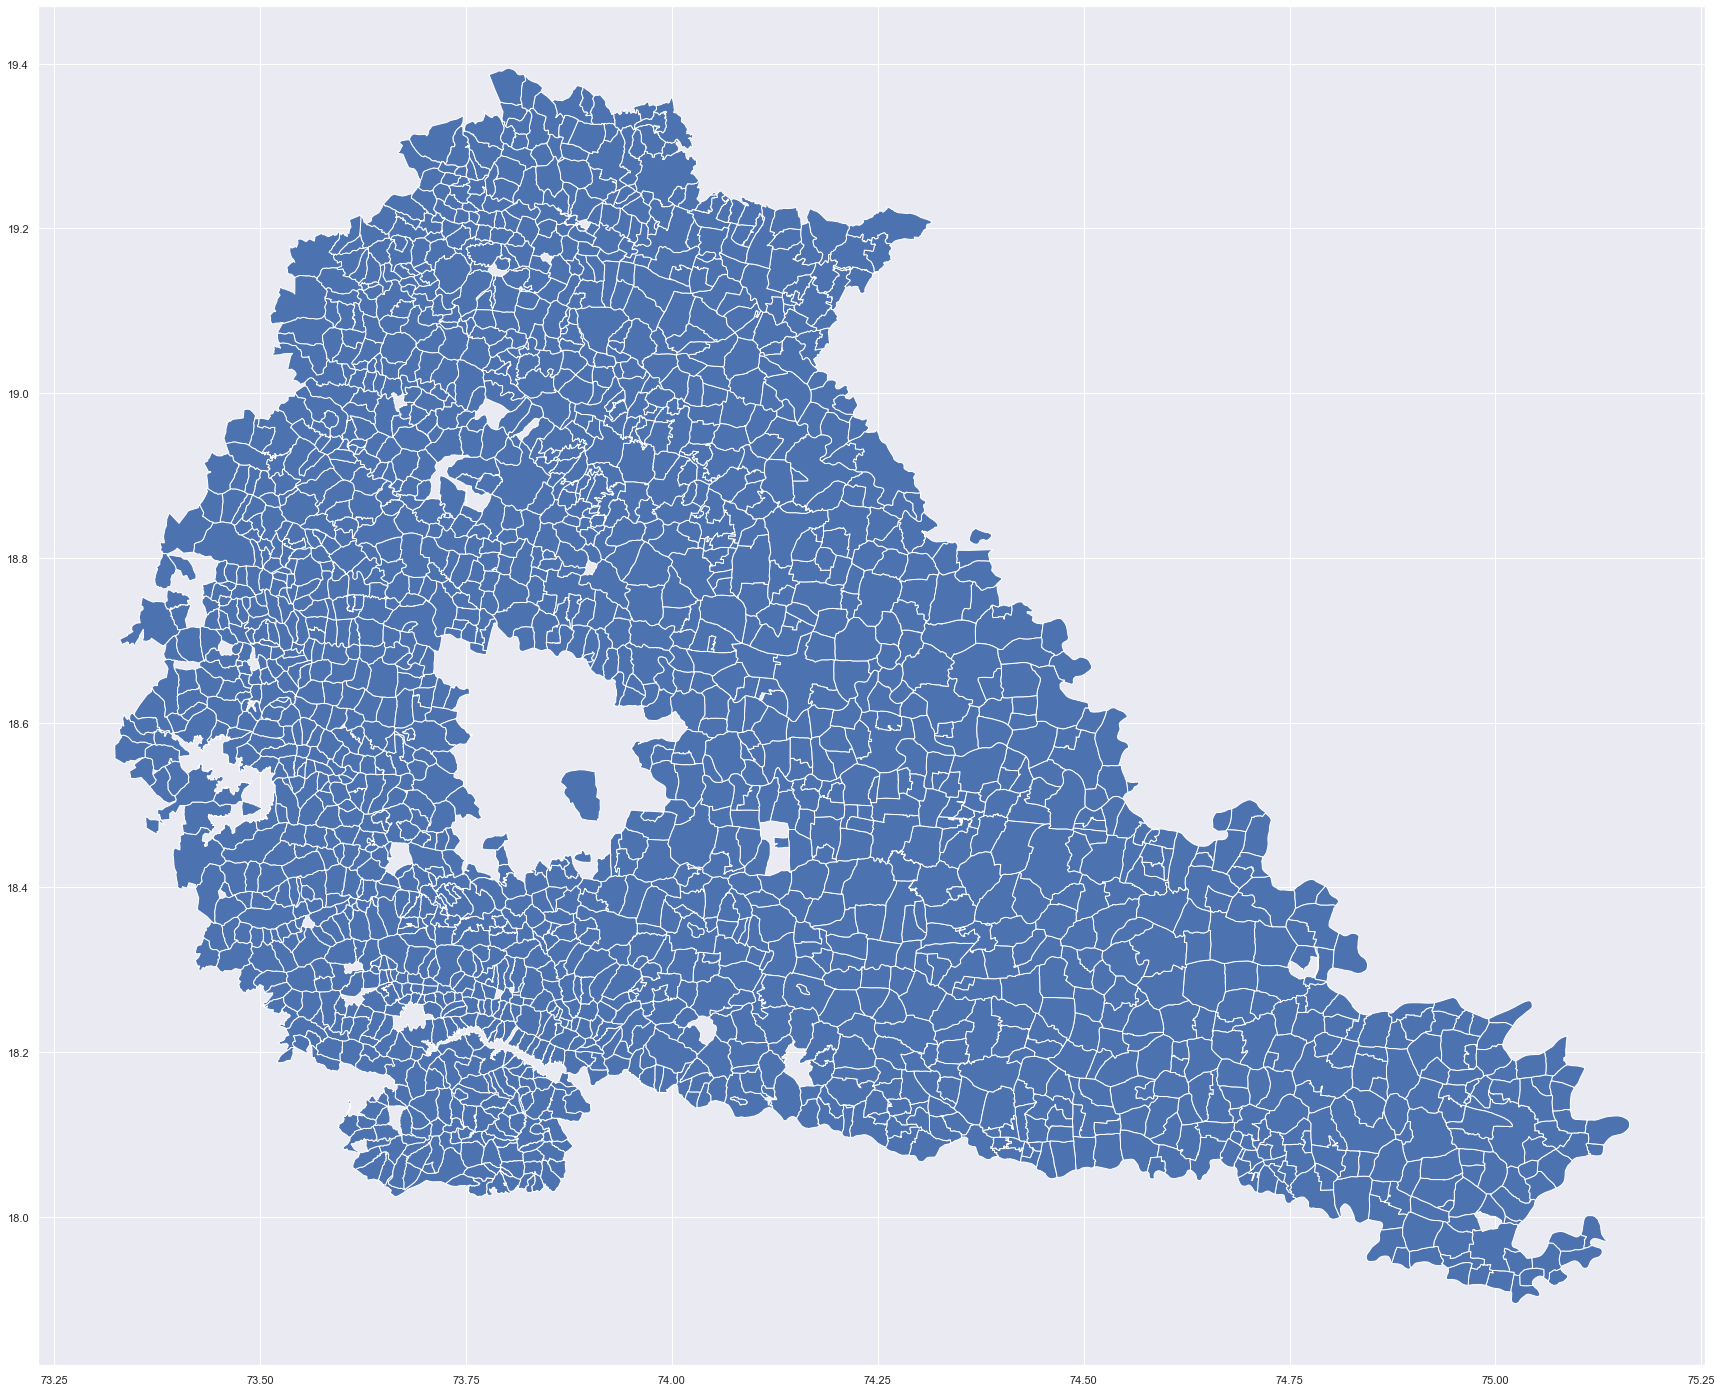

In [16]:
fig, ax = plt.subplots(figsize=(30,25))
pune.plot(ax=ax)

In [17]:
from shapely.geometry import Point, Polygon

In [18]:
crs={'init':'epsg:4326'}

In [19]:
geometry = [Point(xy) for xy in zip(loc['lon'],loc['lat'])]

In [20]:
len(geometry)

2589

In [21]:
geo_df = gpd.GeoDataFrame(datadf, crs=crs, geometry=geometry).drop(columns=['mood','no_stop','address','no_punc', 'text'])
geo_df.to_file(r'All Data/Raw Journey Data/GeoData_Until16May2020.csv', driver='GeoJSON')
geo_df.head()

/usr/local/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,date_modified,date_journal,lat,lon,timezone,favourite,weather,photos,tags,is_personal,cleaned_text,geometry
id,,,,,,,,,,,,
1439137473084-3fc756cc3f8d6404,2017-08-31 01:44:57,2015-08-09 11:24:33,1.7976931348623157e+308,1.7976931348623157e+308,NaN,False,"{'id': -1, 'degree_c': 1.7976931348623157e+308...",[],"['personal', 'published']",1,"The first thing I saw , when I entered her roo...",POINT (1.79769 1.79769)
1439198245820-3fda14add91e3f20,2017-08-22 22:08:05,2015-08-10 04:17:25,1.7976931348623157e+308,1.7976931348623157e+308,NaN,False,"{'id': -1, 'degree_c': 1.7976931348623157e+308...",[],['personal'],1,Philosophy It surprises me ... hw you so effor...,POINT (1.79769 1.79769)
1439198461993-3fefd6db711e0342,2017-10-08 12:24:49,2015-08-10 04:21:01,1.7976931348623157e+308,1.7976931348623157e+308,NaN,False,"{'id': -1, 'degree_c': 1.7976931348623157e+308...",[],['me'],0,Me Write fantasies / inaginary dream world sto...,POINT (1.79769 1.79769)
1439575035515-3feb330512548cbd,2016-04-29 05:23:44,2015-08-14 12:57:15,1.7976931348623157e+308,1.7976931348623157e+308,NaN,False,"{'id': -1, 'degree_c': 1.7976931348623157e+308...",[],['published'],0,"The dwarfs garden He had a garden , that littl...",POINT (1.79769 1.79769)
1440393646546-3fdb2bc02b9f8020,2017-08-18 05:27:31,2015-08-24 00:20:46,1.7976931348623157e+308,1.7976931348623157e+308,NaN,False,"{'id': -1, 'degree_c': 1.7976931348623157e+308...",[],['script'],0,Brigadier Suraj singh My name is brigadier sur...,POINT (1.79769 1.79769)


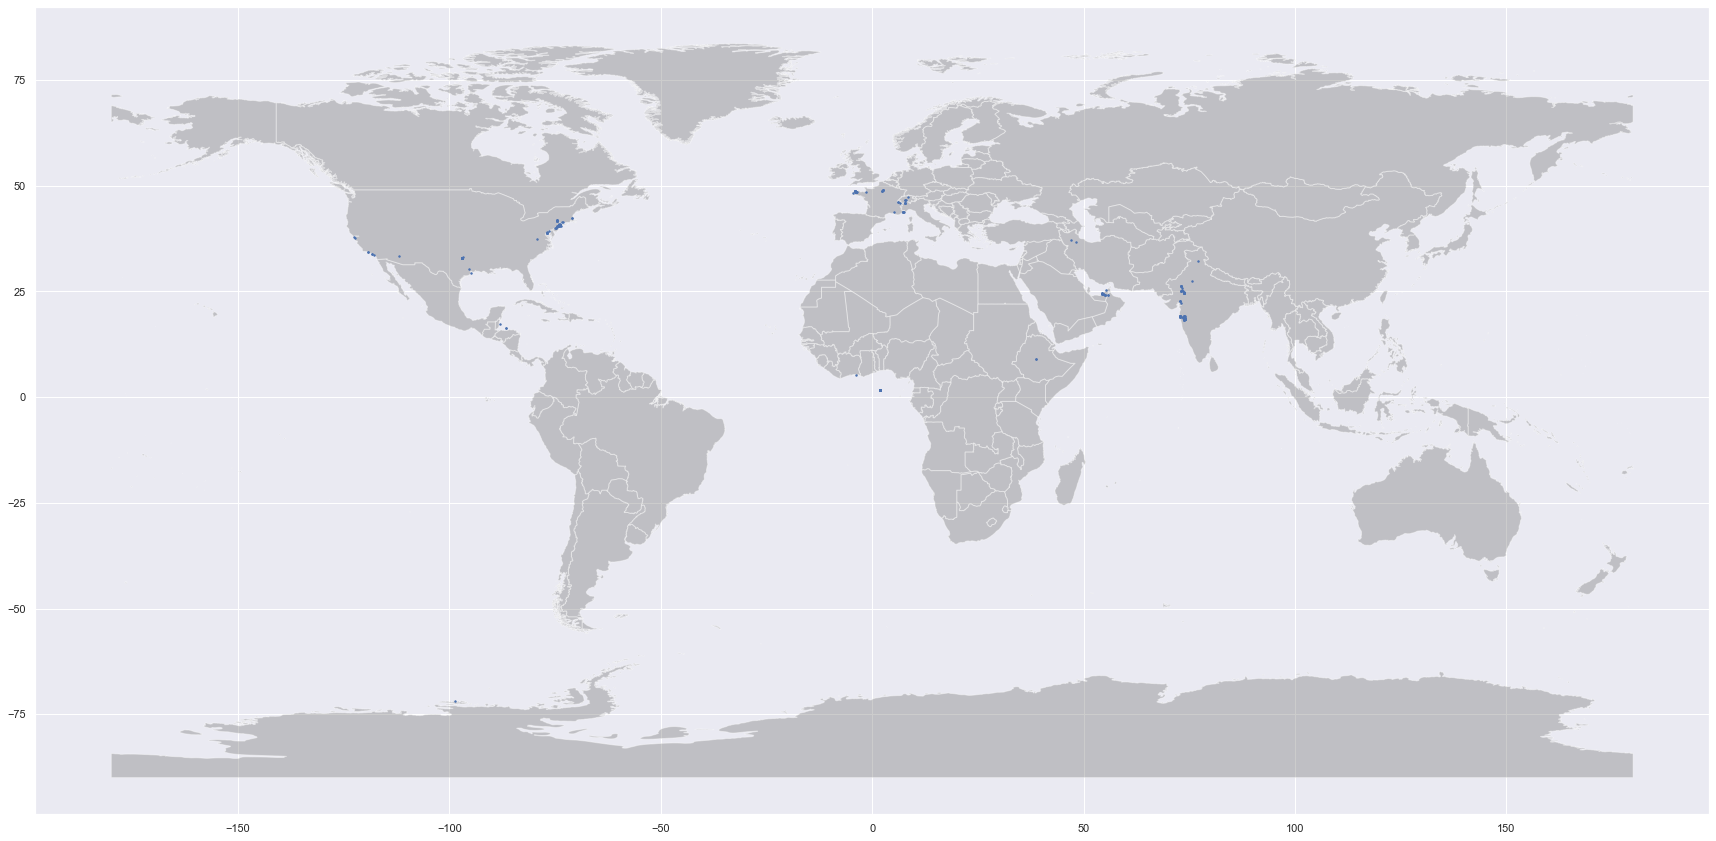

In [22]:
fig, ax = plt.subplots(figsize=(30,25))
world.plot(ax=ax, color='grey', alpha=0.4)
geo_df.plot(ax=ax, markersize=2)

In [27]:
maha_clipped = gpd.clip(geo_df, maha)
fig, ax = plt.subplots(figsize=(30,25))
maha.plot(ax=ax, color='grey', alpha=0.4)
maha_clipped.plot(ax=ax, markersize=2)

AttributeError: 'NoneType' object has no attribute 'intersection'